## Air Pollution data analysis:

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The data might be quite huge as we have colled the past and real_time data from the API
#Reading the data might take few seconds, as of when I am creating the project the size of the data is more that 1GB.

df = pd.read_csv('air_pollution.csv')

In [3]:
#Checking for the length of the data frame, so it is way over a Million rows :!
len(df)

10298033

## Data Pre-processing and cleaning -

In [4]:
df.head()

,Unnamed: 0,Id,Country,State,City,Station,Last Update,Pollution ID,Pollutant Min,Pollutant Max,Pollutant Avg,Pollutant Unit,Measure_Datetime
0,0,1,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM2.5,2.0,20.0,10.0,NaN,14-10-2019 15:00:00
1,1,2,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM10,NaN,NaN,NaN,NaN,14-10-2019 15:00:00
2,2,3,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NO2,6.0,14.0,10.0,NaN,14-10-2019 15:00:00
3,3,4,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NH3,1.0,3.0,2.0,NaN,14-10-2019 15:00:00
4,4,5,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,SO2,6.0,19.0,16.0,NaN,14-10-2019 15:00:00


**So, intrestingly we have a couple of columns `Unnamed: 0` and the index that was created, we can clean that off**

In [5]:
#Droping the index column and Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,Id,Country,State,City,Station,Last Update,Pollution ID,Pollutant Min,Pollutant Max,Pollutant Avg,Pollutant Unit,Measure_Datetime
0,1,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM2.5,2.0,20.0,10.0,NaN,14-10-2019 15:00:00
1,2,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM10,NaN,NaN,NaN,NaN,14-10-2019 15:00:00
2,3,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NO2,6.0,14.0,10.0,NaN,14-10-2019 15:00:00
3,4,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NH3,1.0,3.0,2.0,NaN,14-10-2019 15:00:00
4,5,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,SO2,6.0,19.0,16.0,NaN,14-10-2019 15:00:00


In [7]:
#Checking for the null values
df.isnull().sum()

Id                         0
Country                    0
State                      0
City                       0
Station                    0
Last Update                0
Pollution ID               0
Pollutant Min           9426
Pollutant Max           9426
Pollutant Avg           9426
Pollutant Unit      10298033
Measure_Datetime           0
dtype: int64

In [8]:
#Now, I am dropping the feature 'Pollutant Unit' entirely,
#because since now no data is been added to 'Pollutant Unit'
df.drop('Pollutant Unit', axis=1, inplace=True)

In [9]:
df.columns

Index(['Id', 'Country', 'State', 'City', 'Station', 'Last Update',
       'Pollution ID', 'Pollutant Min', 'Pollutant Max', 'Pollutant Avg',
       'Measure_Datetime'],
      dtype='object')

In [10]:
#Checking to see the States
df['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Delhi',
       'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Odisha', 'Punjab',
       'Rajasthan', 'TamilNadu', 'Telangana', 'Uttar Pradesh',
       'West Bengal', 'Mizoram', 'Nagaland'], dtype=object)

In [11]:
#Generating descriptive statistics.
df.describe()

,Id,Pollutant Min,Pollutant Max,Pollutant Avg
count,1.029803e+07,1.028861e+07,1.028861e+07,1.028861e+07
mean,6.461531e+02,2.333089e+01,7.624740e+01,4.469793e+01
std,3.741411e+02,3.589014e+01,9.349637e+01,5.938469e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.230000e+02,4.000000e+00,1.400000e+01,9.000000e+00
50%,6.450000e+02,1.100000e+01,4.500000e+01,2.400000e+01
75%,9.680000e+02,2.800000e+01,1.000000e+02,5.600000e+01
max,1.421000e+03,5.000000e+02,5.000000e+02,5.000000e+02


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10298033.0,646.153092,374.141088,1.0,323.0,645.0,968.0,1421.0
Pollutant Min,10288607.0,23.330894,35.890143,0.0,4.0,11.0,28.0,500.0
Pollutant Max,10288607.0,76.247402,93.496365,0.0,14.0,45.0,100.0,500.0
Pollutant Avg,10288607.0,44.697926,59.384690,0.0,9.0,24.0,56.0,500.0


In [13]:
#Checking for the data types
df.dtypes

Id                    int64
Country              object
State                object
City                 object
Station              object
Last Update          object
Pollution ID         object
Pollutant Min       float64
Pollutant Max       float64
Pollutant Avg       float64
Measure_Datetime     object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10298033 entries, 0 to 10298032
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Id                int64  
 1   Country           object 
 2   State             object 
 3   City              object 
 4   Station           object 
 5   Last Update       object 
 6   Pollution ID      object 
 7   Pollutant Min     float64
 8   Pollutant Max     float64
 9   Pollutant Avg     float64
 10  Measure_Datetime  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 864.2+ MB


## Data Analysis and Visualization

In [15]:
df['Pollution ID'].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

### Explanation for `Pollutiion ID`

**So, here the `Pollution ID` reffers to the type of pollutant**

--> **'PM2.5'** - It's a particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.


--> **'PM10'** - PM10 is any particulate matter in the air with a diameter of 10 micrometers or less, including smoke, dust, soot, salts, acids, and metals.


--> **'NO2'** - Nitrogen dioxide, or NO2, is a gaseous air pollutant composed of nitrogen and oxygen and is one of a group of related gases called nitrogen oxides, or NOx. NO2 forms when fossil fuels such as coal, oil, gas or diesel are burned at high temperatures.


--> **'NH3'** - NH3 is poisonous if inhaled in great quantities and is irritating to the eyes, nose, and throat in lesser amounts.


--> **'SO2'** -  It is a toxic gas responsible for the smell of burnt matches. It is released naturally by volcanic activity and is produced as a by-product of copper extraction and the burning of sulfur-bearing fossil fuels. 


--> **'CO'** - Carbon monoxide is a major air pollutant and is produced by incomplete burning of fossil fuels in vehicles and industries.


--> **'OZONE'** - Ozone is an air pollutant that harms people and plants. Ground-level ozone forms when nitrogen oxides and volatile organic compounds react with each other in sunlight and hot temperatures.

## Problem Statement 1:
### Which State in India has the highest number of pollutant emittance from 2019 to 2021?

In [16]:
#Checking for the count of states
#This means higher the no.of instances of the state, higher the pollutant the state emitts

df.groupby(['State'])['State'].size().reset_index(name='counts').sort_values('counts', ascending=False)

,State,counts
4,Delhi,1817966
6,Haryana,1374746
20,Uttar Pradesh,1119679
11,Maharashtra,989744
8,Karnataka,770880
10,Madhya Pradesh,698162
21,West Bengal,615232
17,Rajasthan,548006
16,Punjab,393698
2,Bihar,334303


In [17]:
#Taking the max count of pollutant emittant
max_pol_emitt = df.groupby(['State'])['State'].size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

In [18]:
max_pol_emitt

,State,counts
4,Delhi,1817966
6,Haryana,1374746
20,Uttar Pradesh,1119679
11,Maharashtra,989744
8,Karnataka,770880
10,Madhya Pradesh,698162
21,West Bengal,615232
17,Rajasthan,548006
16,Punjab,393698
2,Bihar,334303


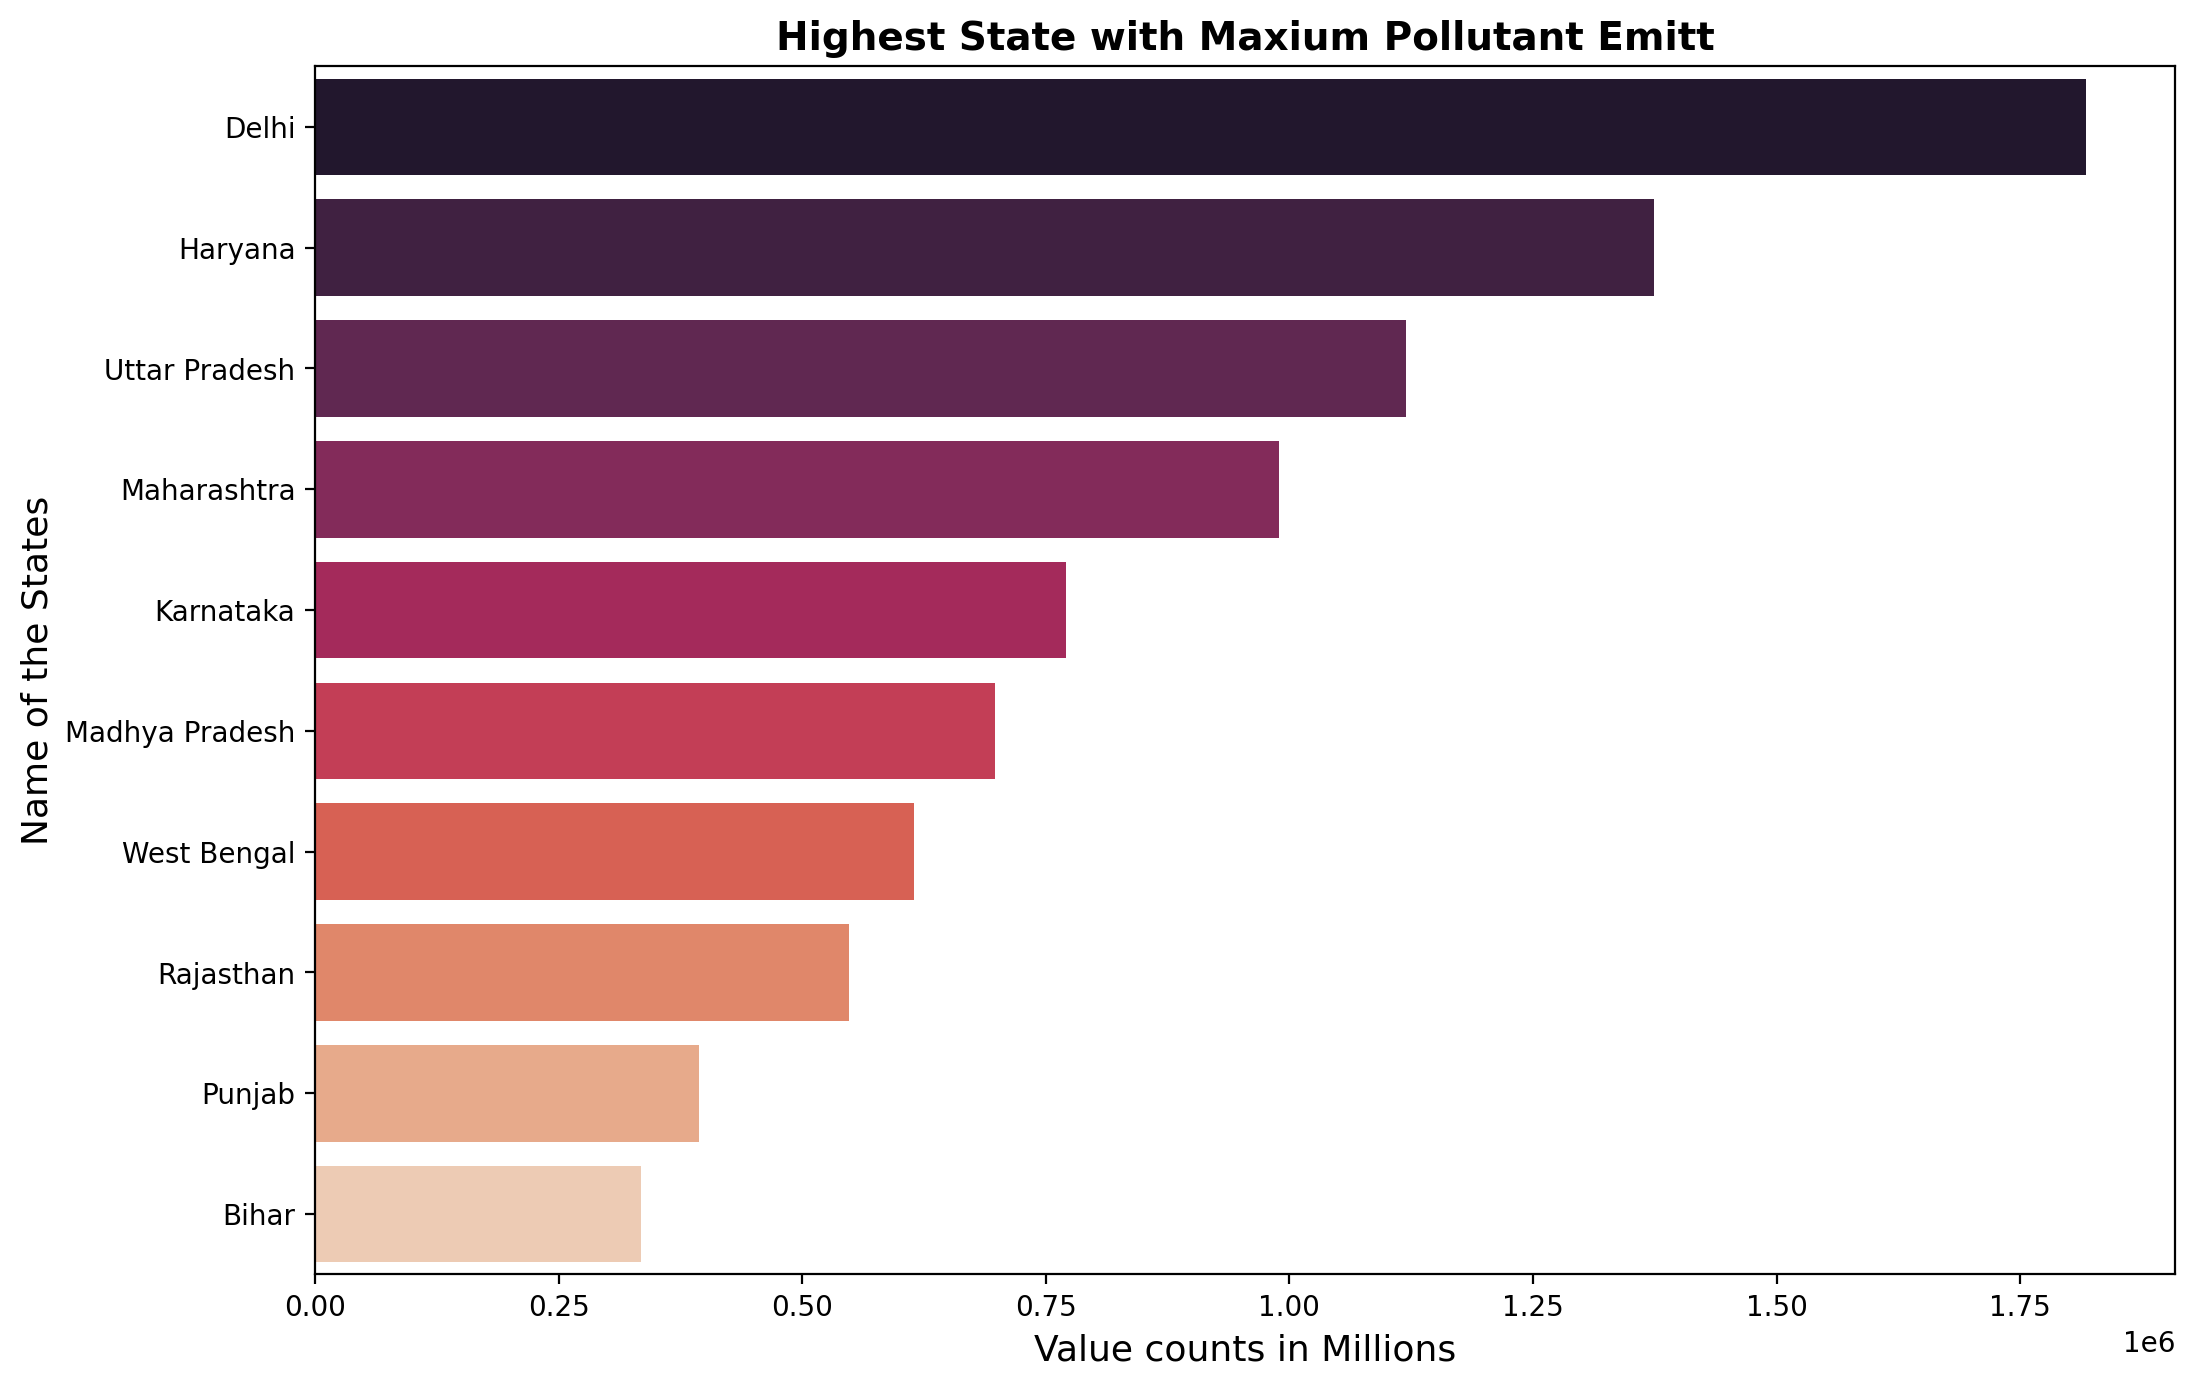

In [19]:
#Visualization of data
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=max_pol_emitt, x='counts',y='State',palette='rocket')

plt.title("Highest State with Maxium Pollutant Emitt", fontsize=14, fontweight = 'bold')
plt.xlabel("Value counts in Millions", fontsize=13)
plt.ylabel("Name of the States", fontsize=13);

#### Key Insight: 
**When counting, it appears that Delhi has the highest number of pollutant emittance; however, this may be an unfair comparison because, when considering the surface area of Delhi to the population, it has the highest count. Domain knowledge is essential in this case. If you want to learn more, read this article about the population-to-land ratio in Delhi. [Artice](https://www.macrotrends.net/cities/21228/delhi/population#:~:text=The%20current%20metro%20area%20population,a%203.03%25%20increase%20from%202019.)**

## Problem Statement 2:
### What are the Major Pollutant emit component for the air pollution caused in Delhi?

In [20]:
#Grouping on a Multiindex
#Here we group by 'State' and 'Pollution ID' and spliting it based on count of 'Pollution ID'

group_pol_ID = df.groupby(['State', 'Pollution ID'])['Pollution ID'].count().to_frame()

In [21]:
group_pol_ID

Pollution ID
State          Pollution ID              
Andhra Pradesh CO                   30399
               NH3                  31617
               NO2                  31973
               OZONE                31971
               PM10                 31627
...                                   ...
West Bengal    NO2                  86833
               OZONE                87936
               PM10                 88817
               PM2.5                87319
               SO2                  89532

[153 rows x 1 columns]

In [31]:
#Creating a df for Delhi's data
delhi_pol = group_pol_ID.loc['Delhi', 'Pollution ID'].sort_values(ascending=False).to_frame()

In [32]:
delhi_pol

,Pollution ID
Pollution ID,
PM2.5,279483
NO2,278863
CO,278201
OZONE,270976
PM10,260417
SO2,229521
NH3,220505


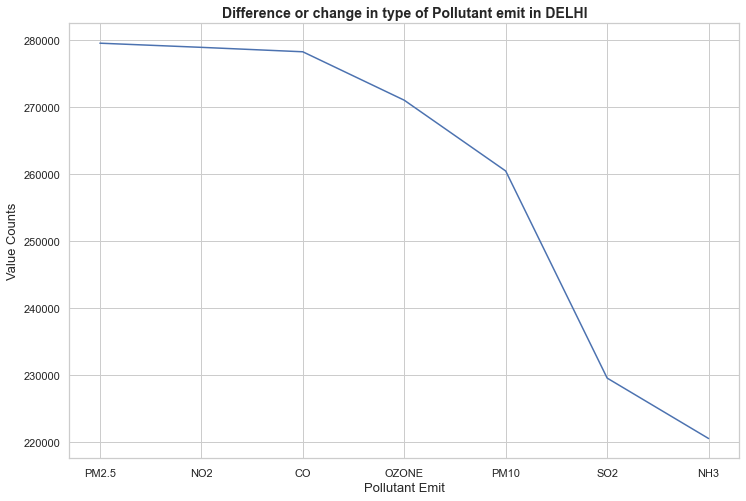

In [40]:
#plotting lineplot for pollutant emit with respect to value count
plt.figure(figsize=(12,8))

sns.set_theme(style="whitegrid")
sns.lineplot(data=delhi_pol, x=delhi_pol.index, y='Pollution ID')
plt.title("Difference or change in type of Pollutant emit in DELHI", fontsize=14, fontweight = 'bold')
plt.xlabel("Pollutant Emit", fontsize=13)
plt.ylabel("Value Counts", fontsize=13);

#### Key insight

**Based on the data, it appears that each state contributes at a different level to different pollutant levels, which could be due to the geographical location of the states.**

**Let's take the example of Delhi itself, based on the data the pollutant emittent `'PM2.5'` and `'NO2'` have the highest count. It's understandable given the large number of vehicles and pollutants emitted by the industries themselves.**
 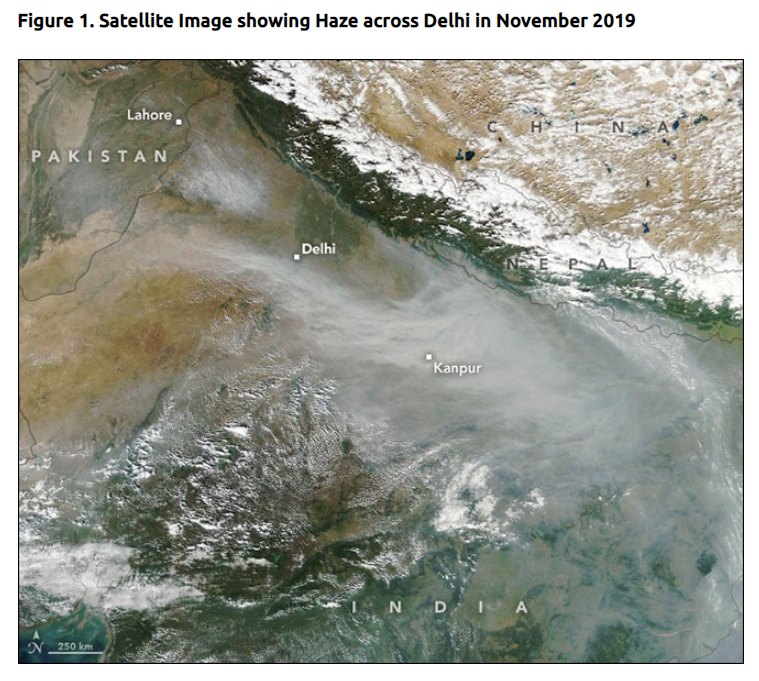
**This artice proves that our findings from the data is almost similar to had acutally happed that resulted on higher Air Pollution. [Article](https://www.orfonline.org/research/air-pollution-delhi-filling-policy-gaps/)**

## Problem Statement 3:
### Which are the Cities that have highest number of pollutant emit?

In [46]:
#Grouping by the cities with respect to their value count of pollutant emits
cities_pol_emit = df.groupby('City')['Id'].count().sort_values(ascending=False).head(10)
cities_pol_emit = cities_pol_emit.to_frame()
cities_pol_emit

,Id
City,
Delhi,1817966
Mumbai,472419
Bengaluru,418638
Kolkata,361561
Hyderabad,299275
Ghaziabad,213782
Patna,194951
Noida,192367
Chennai,168780


In [47]:
#Visuvalizing the data on a geographical plot
#So what geopy.geocoders does is that is gets the latitude and longitude of the Cities we have now
#With the latitude and longitude we can plot that on the Indian Map

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='app')

**[geopy DOCUMENTATION](https://pypi.org/project/geopy/)**

In [49]:
#Created two variable with empty lists to store the latitude and longitude information
#So, it will add the latitude and longitude information of the states we have, if not it will add nan values to the list

latitude = []
longitude = []

for location in cities_pol_emit.index:
    location = geolocator.geocode(location)
    
    if location is None:
        latitude.append(np.nan)
        longitude.append(np.nan)
        
    else:
        latitude.append(location.latitude)
        longitude.append(location.longitude)

In [50]:
# Now, Add these ('Latitude' & 'Longitude') Columns to DataFrame -
cities_pol_emit['Latitude'] = latitude
cities_pol_emit['Longitude'] = longitude

In [51]:
cities_pol_emit

,Id,Latitude,Longitude
City,,,
Delhi,1817966,28.651718,77.221939
Mumbai,472419,19.078545,72.878176
Bengaluru,418638,12.976794,77.590082
Kolkata,361561,22.541418,88.357691
Hyderabad,299275,17.360589,78.474061
Ghaziabad,213782,28.671153,77.412036
Patna,194951,25.609324,85.123525
Noida,192367,28.570784,77.327107
Chennai,168780,13.083694,80.270186


In [52]:
#To Create "Map" or To Create "Interactive Maps", we need "folium" Library.
#Then, we have to Import our 'folium' Library with HeatMap -

import folium
from folium.plugins import HeatMap

**[folium DOCUMENTATION](https://python-visualization.github.io/folium/)**

In [63]:
#Step 1 is to create a base Map Where we set our default location to latitude and longitude on INDIA
#This is will create an Indian map with intractable zoom buttons
#Anyways, the intractive map view will not be visible on GitHub, I will add the Images below :)
#20.5937° N, 78.9629° E are India/Coordinates

def gen_base_map(default_location=[20.5937, 78.9629], default_zoom_start=10):
    base_Map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    
    return base_Map

In [64]:
#Now, Call our 'Function' with "default_location" and "default_zoom_start" will be my Parameters.

base_Map = gen_base_map()

In [65]:
#Then, Call the 'base_Map' to view Indian Map
base_Map

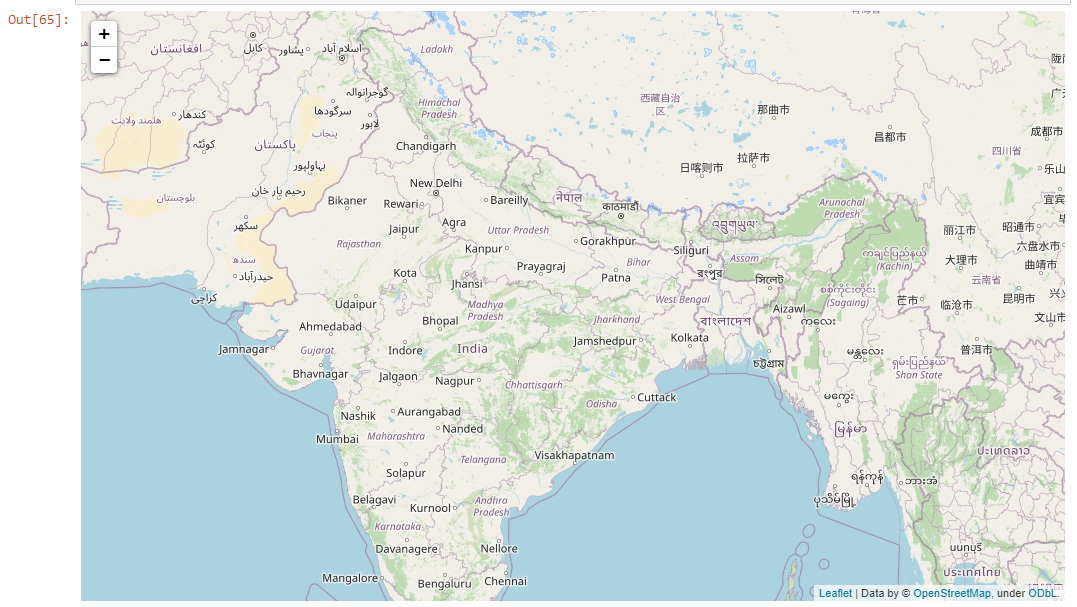

In [67]:
#Now that we have created our base map, we can create a heat layer on top it to see the polluted cities

HeatMap(cities_pol_emit[['Latitude', 'Longitude', 'Id']], zoom=20).add_to(base_Map)

In [68]:
#Then, Call our 'base_Map'
#As mentioned above GitHub do not display intractive maps I have attched the image of the output generated.
base_Map

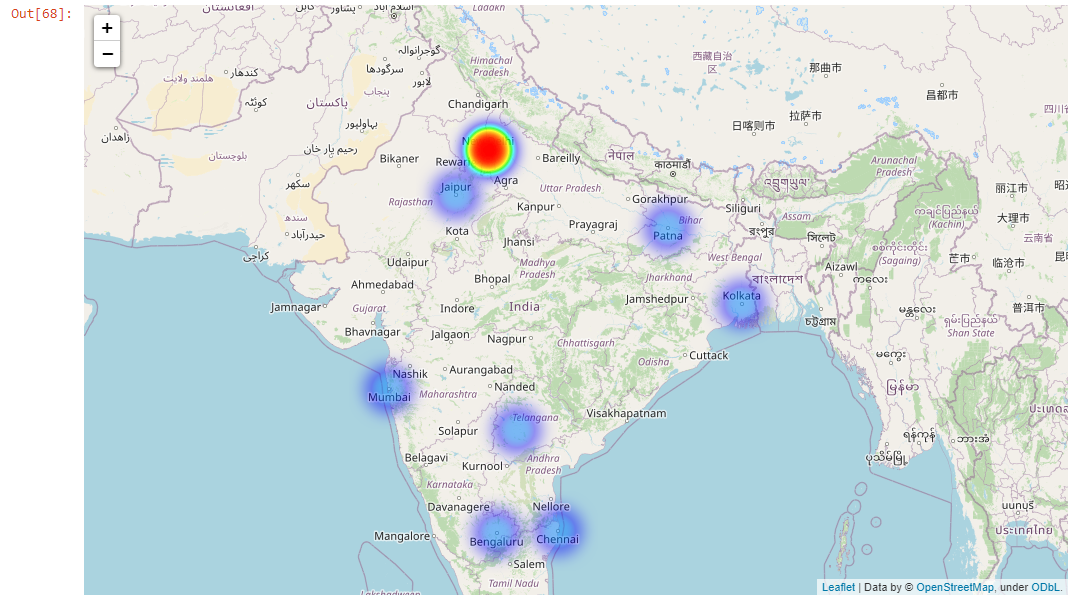

#### Key Insights:

**As we can see that the heat map shows a dark red spot around the area's of Delhi where the air pollution is way higher when compared to all the other cities.**

**Infact, the air pollution in Delhi is so bad that, it has the total pollutant emit of Delhi is equal to rest of the six cities (Mumbai, Bengaluru, Kolkata, Hyderabad, Ghaziabad, Patna) combained :!**

## Problem Statement 4:
### Affect of festivals like Diwali and Dussehra on the air pollution level.

In [69]:
df.head()

,Id,Country,State,City,Station,Last Update,Pollution ID,Pollutant Min,Pollutant Max,Pollutant Avg,Measure_Datetime
0,1,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM2.5,2.0,20.0,10.0,14-10-2019 15:00:00
1,2,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,PM10,NaN,NaN,NaN,14-10-2019 15:00:00
2,3,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NO2,6.0,14.0,10.0,14-10-2019 15:00:00
3,4,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,NH3,1.0,3.0,2.0,14-10-2019 15:00:00
4,5,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2019 03:00:00,SO2,6.0,19.0,16.0,14-10-2019 15:00:00


**In the year 2019 Diwali was celebrated in October 27, so in order to find the pollution level we need to the Pollutant Avg from 4 days before Diwali and 4 days after Diwali in order to do a fair comparion**

In [75]:
#Lets check for the dtype of 'Last Update' column and convert that into date type and we can split them into date and time
df['Last Update'].dtype

dtype('O')

In [76]:
#Converting the Object data type to datetime
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [77]:
#Spliting the date from the timestamp
df['Date'] = [d.date() for d in df['Last Update']]
df['Time'] = [d.time() for d in df['Last Update']]

In [78]:
df.head()

,Id,Country,State,City,Station,Last Update,Pollution ID,Pollutant Min,Pollutant Max,Pollutant Avg,Measure_Datetime,Date,Time
0,1,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-14 03:00:00,PM2.5,2.0,20.0,10.0,14-10-2019 15:00:00,2019-10-14,03:00:00
1,2,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-14 03:00:00,PM10,NaN,NaN,NaN,14-10-2019 15:00:00,2019-10-14,03:00:00
2,3,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-14 03:00:00,NO2,6.0,14.0,10.0,14-10-2019 15:00:00,2019-10-14,03:00:00
3,4,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-14 03:00:00,NH3,1.0,3.0,2.0,14-10-2019 15:00:00,2019-10-14,03:00:00
4,5,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-14 03:00:00,SO2,6.0,19.0,16.0,14-10-2019 15:00:00,2019-10-14,03:00:00


In [83]:
#Converting the Object data type to datetime
df['Date'] = pd.to_datetime(df['Date'])

dtype('<M8[ns]')

In [93]:
#So, now we have two new columns Date and time we can take the data from the required dates
start_date = '2019-10-17'
end_date = '2019-10-31'

diwali_dates = df[(df['Date']>start_date) & (df['Date'] <= end_date)]

In [94]:
diwali_dates

,Id,Country,State,City,Station,Last Update,Pollution ID,Pollutant Min,Pollutant Max,Pollutant Avg,Measure_Datetime,Date,Time
98139,1,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-18 12:00:00,PM2.5,6.0,68.0,32.0,18-10-2019 24:00:00,2019-10-18,12:00:00
98140,2,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-18 12:00:00,PM10,10.0,67.0,36.0,18-10-2019 24:00:00,2019-10-18,12:00:00
98141,3,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-18 12:00:00,NO2,9.0,28.0,17.0,18-10-2019 24:00:00,2019-10-18,12:00:00
98142,4,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-18 12:00:00,NH3,2.0,3.0,3.0,18-10-2019 24:00:00,2019-10-18,12:00:00
98143,5,India,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2019-10-18 12:00:00,SO2,5.0,21.0,14.0,18-10-2019 24:00:00,2019-10-18,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376543,1242,India,West Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2019-10-29 12:00:00,NO2,7.0,34.0,20.0,29-10-2019 12:00:00,2019-10-29,12:00:00
376544,1243,India,West Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2019-10-29 12:00:00,NH3,2.0,3.0,2.0,29-10-2019 12:00:00,2019-10-29,12:00:00
376545,1244,India,West Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2019-10-29 12:00:00,SO2,4.0,17.0,8.0,29-10-2019 12:00:00,2019-10-29,12:00:00
376546,1245,India,West Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2019-10-29 12:00:00,CO,18.0,75.0,22.0,29-10-2019 12:00:00,2019-10-29,12:00:00


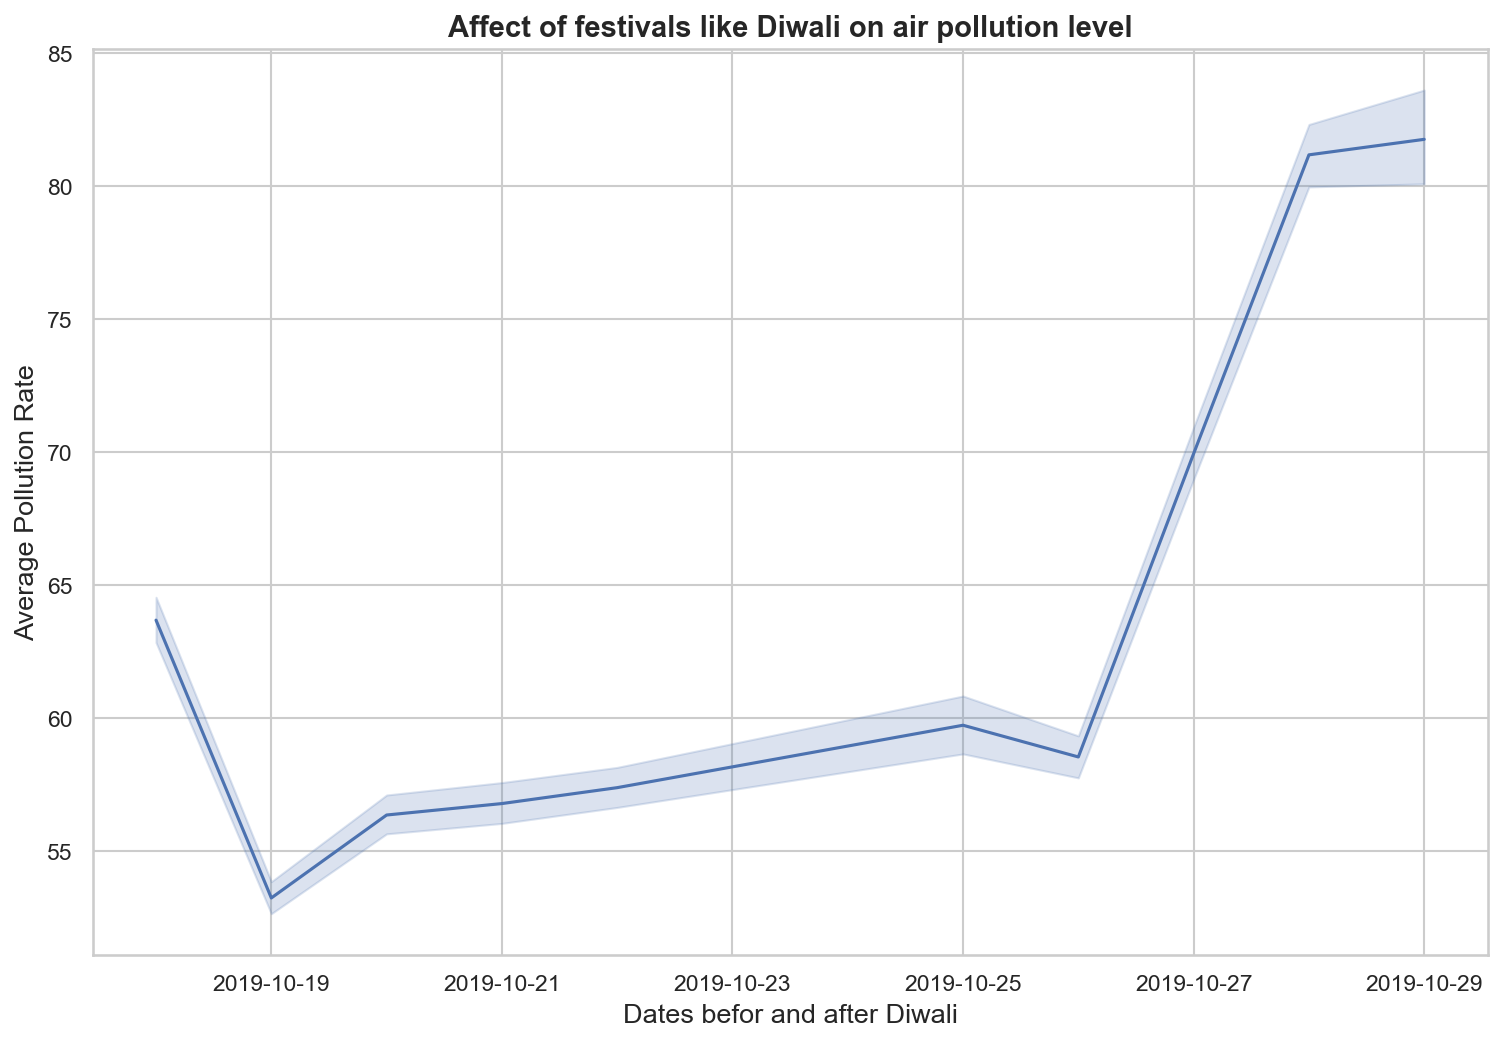

In [96]:
plt.figure(figsize=(12,8), dpi=150)

sns.lineplot(data=diwali_dates, x='Date', y='Pollutant Avg')

plt.title("Affect of festivals like Diwali on air pollution level", fontsize=14, fontweight = 'bold')
plt.xlabel("Dates befor and after Diwali", fontsize=13)
plt.ylabel("Average Pollution Rate", fontsize=13);

#### Key Insights:

**As we can clearly see that there is huge spike in air pollution level between `2019-10-23` to `2019-10-29`**

**The fact that the pollution level rose from 55 to over 80 in just three to five days is a striking indication that firecrackers can significantly raise the air pollution level.**

## Problem Statement 5:
### Is the pollution level less in winter months like January and February compared to November and December?

In [105]:
#First we will collect the Avg pollution data for the months Jan and Feb

start_date = '2020-01-01'
end_date = '2020-03-01'

jan_feb_pollution_df = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
jan_feb_pollution_df = jan_feb_pollution_df[['Date','Pollutant Avg']]
jan_feb_pollution_df

,Date,Pollutant Avg
1846035,2020-02-01,107.0
1846036,2020-02-01,87.0
1846037,2020-02-01,15.0
1846038,2020-02-01,4.0
1846039,2020-02-01,22.0
...,...,...
9371580,2020-02-09,19.0
9371581,2020-02-09,4.0
9371582,2020-02-09,4.0
9371583,2020-02-09,51.0


In [106]:
#Collecting the Avg pollution data for the months nov and dec

start_date = '2019-11-01'
end_date = '2020-01-01'

nov_dec_pollution_df = df[(df['Date']>start_date) & (df['Date'] <= end_date)]
nov_dec_pollution_df = nov_dec_pollution_df[['Date', 'Pollutant Avg']]
nov_dec_pollution_df

,Date,Pollutant Avg
488421,2019-11-11,65.0
488422,2019-11-11,69.0
488423,2019-11-11,17.0
488424,2019-11-11,3.0
488425,2019-11-11,15.0
...,...,...
1846030,2020-01-01,67.0
1846031,2020-01-01,11.0
1846032,2020-01-01,7.0
1846033,2020-01-01,62.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


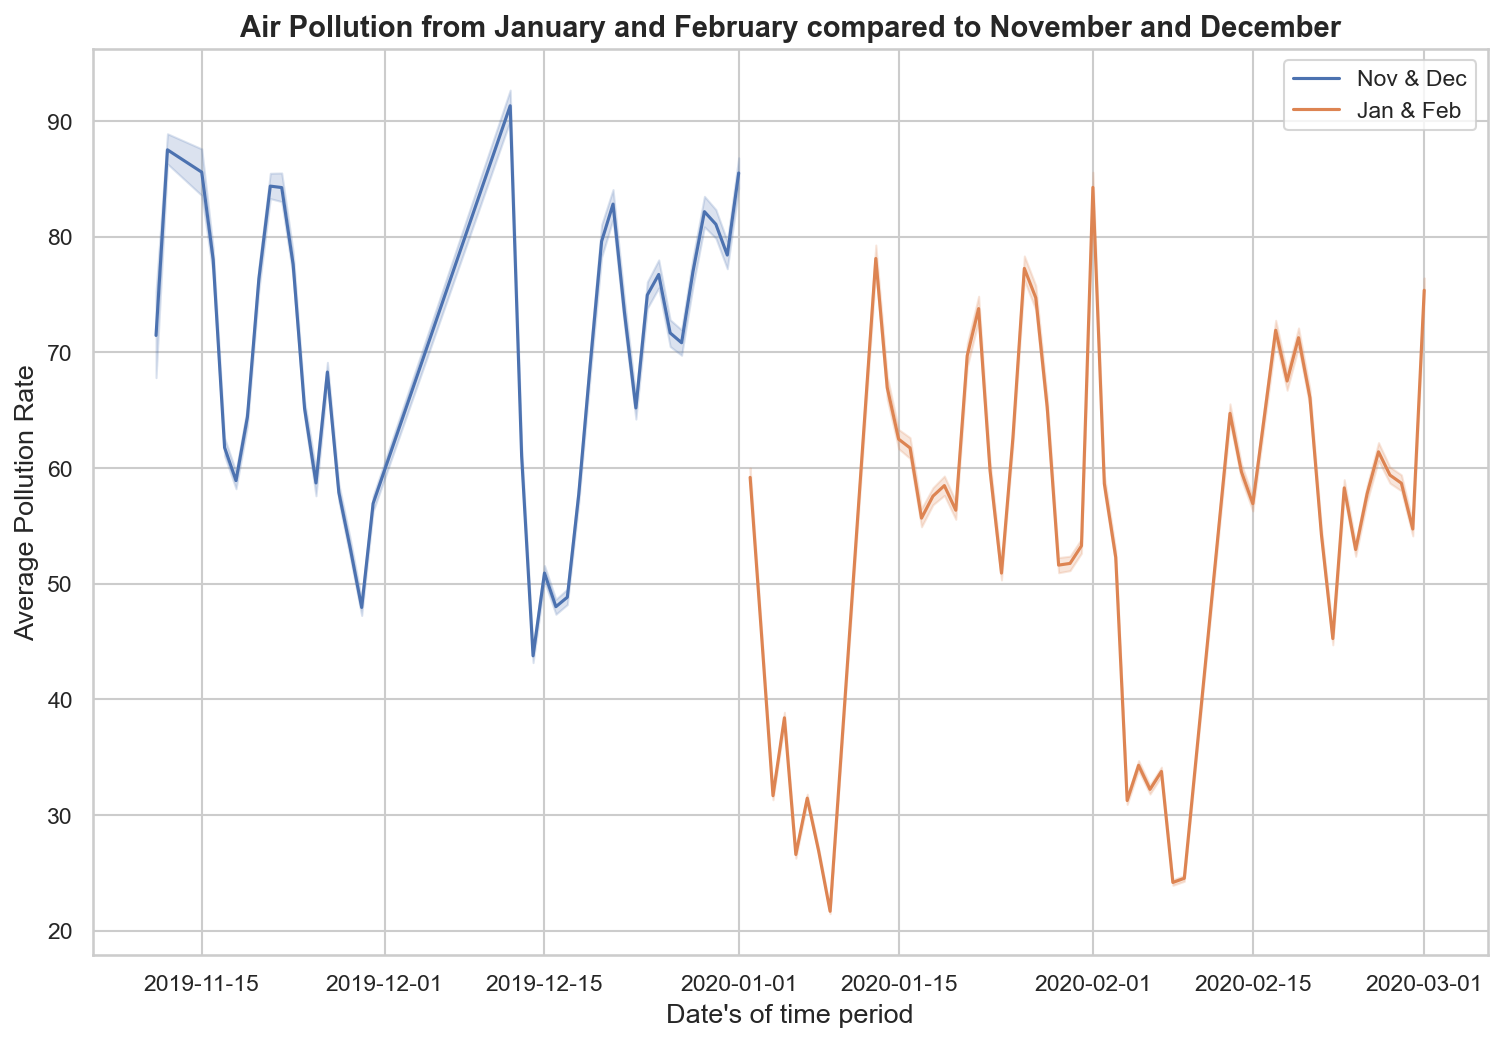

In [116]:
#Plotting the data into line chart

plt.figure(figsize=(12,8), dpi=150)
sns.lineplot(data=nov_dec_pollution_df, x='Date', y='Pollutant Avg', label='Nov & Dec')
sns.lineplot(data=jan_feb_pollution_df,x='Date', y='Pollutant Avg', label='Jan & Feb')

plt.title("Air Pollution from January and February compared to November and December", fontsize=14, fontweight = 'bold')
plt.xlabel("Date's of time period", fontsize=13)
plt.ylabel("Average Pollution Rate", fontsize=13)
leg =ax.legend();

#### Key Insights:

**According to the above line map, the average air pollution level from November through February ranged from 50 to 70.**

**But the months of November and December are when air pollution reaches its worst levels. And during the months of January and February, the amount of air pollution typically drops from 50 to 60 to 40 to 30.**

**Yes, the pollution level is marginally less in in winter months like January and February**